### SVM

1. pertama kali kita lakukan adalah mengimport beberapa library yang dibutuhkan untuk menjalankan dataset seperti numpy,pandas,matplotlib,seaborn, dan sklearn. dimana numpy digunakan untuk operasi numerik.matplotlib.pyplot digunakan untuk membuat visualisasi. seaborn digunakan untuk membuat visualisasi yang lebih estetik.sklearn.svm.SVC adalah Support Vector Classification yang digunakan untuk membuat model SVM (Support Vector Machine) untuk klasifikasi.sklearn.model_selection.train_test_split digunakan untuk membagi data menjadi set pelatihan dan pengujian.

2. Menggunakan Pandas (pd) untuk membaca dataset dari file CSV. 

3. pada 'X = dataset[['temperature_celsius', 'temperature_fahrenheit']]
y = dataset['waktu_hari']
y = np.where(y == 'siang', 1, -1)', kita Memilih dua fitur untuk klasifikasi: 'temperature_celsius' dan 'temperature_fahrenheit'. Memetakan kelas target 'waktu_hari' menjadi biner: 1 untuk 'siang' dan -1 untuk 'bukan siang'.

4. pada 'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)' Membagi dataset menjadi data latih (train) dan data uji (test) dengan perbandingan 70-30.

5. membuat model SVM pada 'svm = SVC(kernel="linear")' kita Membuat objek classifier (model) SVM dengan kernel linier. dan pelatihan model pada 'svm.fit(X_train, y_train)'.

6. pada 'support_vectors = svm.support_vectors_'kita  Menyimpan nilai support vectors yang digunakan oleh model SVM.
dan visualisasi scatter plot dengan seaborn pada 'sns.scatterplot(x='temperature_celsius', y='temperature_fahrenheit', hue='waktu_hari', data=dataset)' serta menambahkan titik plot dalam 'plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')'.

7. selanjutnya kita akan mneggambar decision 'ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])'.dan selanjutnya kita tinggal menambahkan keterangan pada grafik kita nanti dengan 'plt.xlabel('Temperature (Celsius)')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')'.

c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


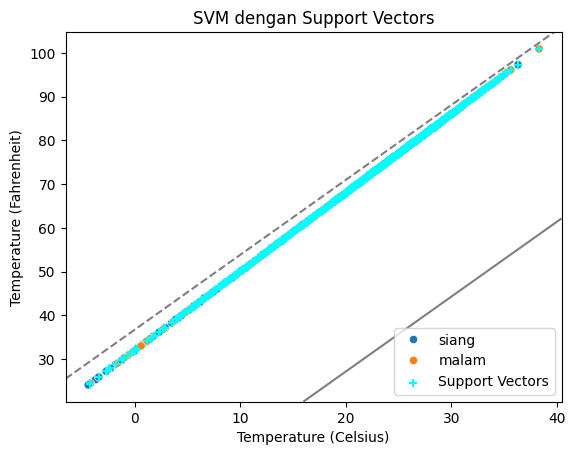

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('IndianWeatherRepository.csv')


X = dataset[['temperature_celsius', 'temperature_fahrenheit']]
y = dataset['waktu_hari']
y = np.where(y == 'siang', 1, -1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm = SVC(kernel="linear")


svm.fit(X_train, y_train)


support_vectors = svm.support_vectors_


sns.scatterplot(x='temperature_celsius', y='temperature_fahrenheit', hue='waktu_hari', data=dataset)

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')


ax = plt.gca() 
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), 
                     np.linspace(ylim[0], ylim[1])) 
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)  

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()


## Evaluasi Hasil Prediksi

1. pertama kita mengimport library yang dibutuhkan dimana confusion_matrix digunakan untuk menghitung confusion matrix.
classification_report digunakan untuk menghasilkan laporan klasifikasi.

2. pada 'y_pred = svm.predict(X_test)' kita Menggunakan model SVM yang telah dilatih untuk memprediksi kelas dari data uji (X_test).

3. pada 'conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)'.dimana kita  Menghitung confusion matrix dengan membandingkan nilai sebenarnya (y_test) dengan prediksi yang dihasilkan (y_pred).Confusion matrix adalah tabel yang digunakan untuk menggambarkan kinerja model klasifikasi pada set data uji yang nilai sebenarnya diketahui. Terdiri dari True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

4. pada 'class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)'. kita Menghasilkan laporan klasifikasi yang mencakup presisi (precision), recall, f1-score, dan support untuk masing-masing kelas. Laporan klasifikasi memberikan statistik klasifikasi yang lebih rinci yang membantu dalam mengevaluasi performa model klasifikasi.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = svm.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Confusion Matrix:
[[   0 2543]
 [   0 2711]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      2543
           1       0.52      1.00      0.68      2711

    accuracy                           0.52      5254
   macro avg       0.26      0.50      0.34      5254
weighted avg       0.27      0.52      0.35      5254



c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

1. seperti biasa kita mengimport library yang dibutuhkan terlebih dahulu dimana mean_absolute_error digunakan untuk menghitung Mean Absolute Error (MAE). mean_squared_error digunakan untuk menghitung Mean Squared Error (MSE). r2_score digunakan untuk menghitung R-squared Score. math adalah modul matematika standar dalam Python

2. prediksi model pada y_pred_reg = svm.predict(X_test)


3. Menghitung Mean Absolute Error (MAE), yang merupakan rata-rata dari nilai absolut dari selisih antara prediksi dan nilai sebenarnya (y_test) pada 'Menghitung Mean Absolute Error (MAE), yang merupakan rata-rata dari nilai absolut dari selisih antara prediksi dan nilai sebenarnya (y_test)'

4. Menghitung Mean Squared Error (MSE), yang merupakan rata-rata dari kuadrat selisih antara prediksi dan nilai sebenarnya (y_test). pada'mse = mean_squared_error(y_test, y_pred_reg)'.

5. Menghitung Root Mean Squared Error (RMSE) dengan mengambil akar kuadrat dari MSE. pada 'rmse = math.sqrt(mse)'.

6. Menghitung R-squared Score, yang memberikan informasi tentang seberapa baik model kita cocok dengan data. Nilai R-squared antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya pada 'r2 = r2_score(y_test, y_pred_reg)'.dan menampilkan hasil efaluasi dengan 'print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r2)'

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred_reg = svm.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_reg)

mse = mean_squared_error(y_test, y_pred_reg)


rmse = math.sqrt(mse)


r2 = r2_score(y_test, y_pred_reg)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r2)


Mean Absolute Error (MAE): 0.9680243623905596
Mean Squared Error (MSE): 1.9360487247811191
Root Mean Squared Error (RMSE): 1.391419679601061
R-squared Score: -0.9380302471412763


1. K-Means adalah algoritma clustering unsupervised learning yang tidak memprediksi nilai pada target seperti klasifikasi atau regresi. Oleh karena itu, evaluasi dalam bentuk confusion matrix, classification report, MAE, MSE, RMSE, atau R2-Score tidak dapat diterapkan pada hasil prediksi K-Means. Namun, untuk memvisualisasikan hasil klustering K-Means dengan lebih baik, kita menggunakan scatter plot yang membagi data ke dalam kluster berbeda dan menandai pusat kluster dengan simbol 'X' berwarna merah. Hal ini memungkinkan kita untuk melihat sebaran data dalam ruang fitur suhu dan memahami pengelompokannya berdasarkan kluster yang dihasilkan oleh algoritma K-Means.

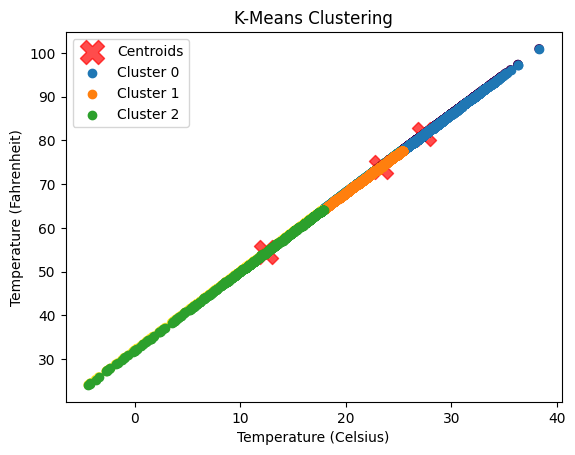

In [41]:
import matplotlib.pyplot as plt


plt.scatter(X['temperature_celsius'], X['temperature_fahrenheit'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=300, alpha=0.7, label='Centroids')


unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_points = X[labels == label]
    plt.scatter(cluster_points['temperature_celsius'], cluster_points['temperature_fahrenheit'], label=f'Cluster {label}')

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


1. seperti biasa kita menyiapkan library yang dibutuhkan terlebih dahulu.dimana pandas digunakan untuk manipulasi dan analisis data. numpy adalah library untuk operasi numerik. matplotlib.pyplot digunakan untuk membuat visualisasi. sklearn.cluster.KMeans adalah kelas yang akan kita gunakan untuk menerapkan algoritma K-Means.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


2. disini kita hanya membaca dataset menggunakan pandas.

In [31]:

dataset = pd.read_csv('IndianWeatherRepository.csv')


print("Informasi Dataset:")
print(dataset.info())


print("\nBeberapa Baris Pertama Dataset:")
print(dataset.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       17511 non-null  object 
 1   location_name                 17511 non-null  object 
 2   region                        17511 non-null  object 
 3   latitude                      17511 non-null  float64
 4   longitude                     17511 non-null  float64
 5   timezone                      17511 non-null  object 
 6   last_updated_epoch            17511 non-null  int64  
 7   last_updated                  17511 non-null  object 
 8   temperature_celsius           17511 non-null  float64
 9   temperature_fahrenheit        17511 non-null  float64
 10  condition_text                17511 non-null  object 
 11  wind_mph                      17511 non-null  float64
 12  wind_kph                      17511 non-n

3.  memilih fitur-fitur numerik dari dataset yang akan digunakan untuk proses clustering. Misalnya, kita akan menggunakan kolom 'temperature_celsius' dan 'temperature_fahrenheit'.

In [32]:
X = dataset[['temperature_celsius', 'temperature_fahrenheit']]


4. menentukan jumlah cluster k sesuai dengan jumlah target.

In [33]:
K = 3


5. kita akan menerapkan metode means

In [34]:
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

6. kita akan mendapatkan label cluster dari setiap data.

In [35]:
labels = kmeans.labels_


7. pusat cluster

In [36]:
cluster_centers = kmeans.cluster_centers_


8. inilah visualisasi hasil clustering

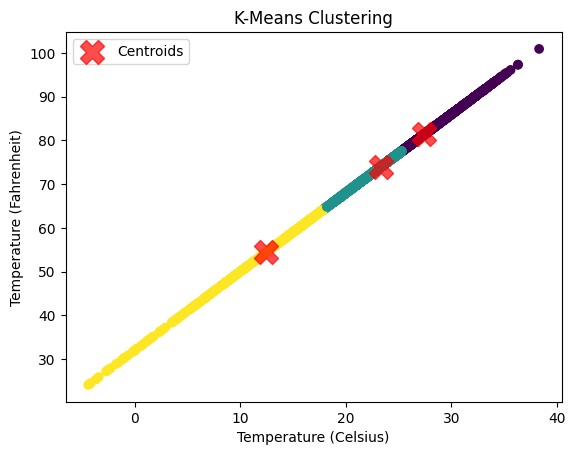

In [37]:
plt.scatter(X['temperature_celsius'], X['temperature_fahrenheit'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=300, alpha=0.7, label='Centroids')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


1. kita mengimport dua metrik evaluasi untuk mengukur kualitas clustering, yaitu Silhouette Score dan Davies-Bouldin Index, dari pustaka scikit-learn. Inertia, yang merepresentasikan sejauh mana titik-titik data dalam suatu kluster, dihitung dengan mengakses nilai inertia dari objek kmeans. Silhouette Score digunakan untuk mengukur seberapa dekat setiap titik data dalam kluster terdekat dibandingkan dengan kluster lainnya. Davies-Bouldin Index mengukur seberapa baik kluster telah dipisahkan satu sama lain. Hasil dari evaluasi metrik ini ditampilkan dengan mencetak nilai Inertia, Silhouette Score, dan Davies-Bouldin Index.

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


inertia = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


davies_bouldin = davies_bouldin_score(X, labels)

print('Inertia:', inertia)
print('Silhouette Score:', silhouette_avg)
print('Davies-Bouldin Index:', davies_bouldin)


Inertia: 261278.52353846765
Silhouette Score: 0.5390016677100792
Davies-Bouldin Index: 0.5625308783523465


1. kita akan mengevaluasi kualitas clustering dengan menggunakan beberapa metrik, terutama dalam konteks clustering dengan label yang sebenarnya (labeled dataset). Pertama, kolom 'waktu_hari' dari dataset diambil sebagai label yang seharusnya. Selanjutnya, empat metrik evaluasi clustering digunakan, yaitu Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Completeness Score, dan Homogeneity Score. ARI mengukur sejauh mana kluster sesuai dengan label sebenarnya, AMI mengukur seberapa baik informasi yang dibagi antara kluster dan label sebenarnya, sementara Completeness Score dan Homogeneity Score mengukur keterkaitan antara kluster dan label. Hasil evaluasi ini, termasuk ARI, AMI, Completeness Score, dan Homogeneity Score, dicetak untuk memberikan pemahaman tentang kualitas clustering dengan label yang sebenarnya

In [39]:

y_true = dataset['waktu_hari']


ari = adjusted_rand_score(y_true, labels)
ami = adjusted_mutual_info_score(y_true, labels)
completeness = completeness_score(y_true, labels)
homogeneity = homogeneity_score(y_true, labels)

print('Adjusted Rand Index:', ari)
print('Adjusted Mutual Information:', ami)
print('Completeness Score:', completeness)
print('Homogeneity Score:', homogeneity)


Adjusted Rand Index: -3.8782961616319724e-05
Adjusted Mutual Information: -2.6410091472855775e-05
Completeness Score: 4.365444575555719e-05
Homogeneity Score: 5.3166135776409395e-05


1. kita akan  memvisualisasikan hasil dari proses clustering menggunakan algoritma K-Means. Pertama, menggunakan plt.scatter, titik-titik data pada fitur 'temperature_celsius' dan 'temperature_fahrenheit' dipetakan ke dalam diagram dengan pewarnaan sesuai dengan label kluster yang diberikan (c=labels) dan menggunakan skala warna 'viridis'. Pusat kluster (centroids) dari masing-masing kluster diwakili dengan simbol 'X' berwarna merah, dengan ukuran 300 dan transparansi 0.7. Selanjutnya, untuk setiap label unik, titik-titik pada kluster tersebut dipisahkan dan dipetakan ulang dalam diagram dengan label 'Cluster [label]'. Akhirnya, label sumbu x dan y diberi judul "Temperature (Celsius)" dan "Temperature (Fahrenheit)" masing-masing, judul diagram ditetapkan sebagai "K-Means Clustering", dan legenda ditampilkan untuk membedakan antara titik data dan pusat kluster. Hasil visualisasi ini memberikan gambaran yang jelas tentang sebaran kluster dan pusat-pusat kluster dalam ruang fitur suhu.

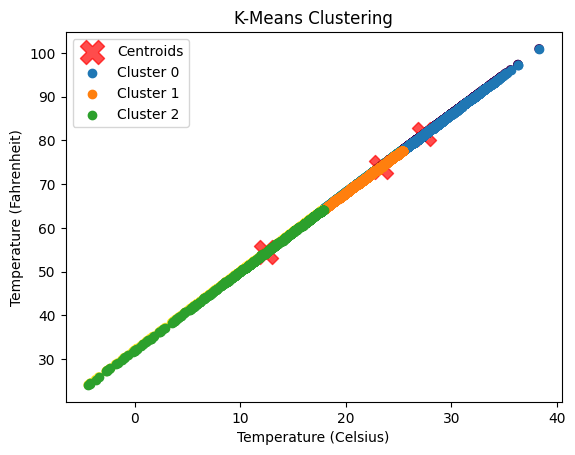

In [40]:

plt.scatter(X['temperature_celsius'], X['temperature_fahrenheit'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=300, alpha=0.7, label='Centroids')


unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_points = X[labels == label]
    plt.scatter(cluster_points['temperature_celsius'], cluster_points['temperature_fahrenheit'], label=f'Cluster {label}')

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
